# Final Report
## Kunal Naidu
## 30020999

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

import urllib.request

## Introduction
In this report, we will be working with data involving CO2 concentrations in dry air over several years. The data will be extrapolated from a text document and exanmined using graphs. We will also explore the Chi-square test and their use.


First we will take the file and use it to use np.genfromtxt to extrapolate the data from the table and assign the data to a list.

In [2]:
url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'
data = []
fid = urllib.request.urlopen(url)
data=np.genfromtxt(fid)
fid.close()

We will than check to see if the size of list is what we expected from the table. We can easily verify that the table and the list have the same amount of columns which is 7. 

In [3]:
print(np.shape(data))

(721, 7)


Now we will check to see if the different columns of the list and the table are the same. We can check this by checking to see if the last column in the list is the same as what we expected.

In [4]:
years=data[:,0]
month=data[:,1]
decimal_date=data[:,2]
average=data[:,3]
interpolated=data[:,4]
trend=data[:,5]
days=data[:,6]

check_row_1=[1958,3,1958.208,315.71,315.71,314.62,-1]
check_row_last=[2018,2,2018.125,408.35,408.35,407.61,28]
variables=[years,month,decimal_date,average,interpolated,trend,days]


error=0.0

for i,j,k, in zip(check_row_1,check_row_last,variables) :
    error_initial=(abs(i-k[0])/abs(i))*100
    if error_initial >= 0.1:
        error=error+1
        
if error == 0.0:
    print('Values match')
else:
    print("Values don't match")

Values match


Now we will plot the values comparing the decimal date to the average, interpolated, and trend values.

Text(0,0.5,'Average (ppm)')

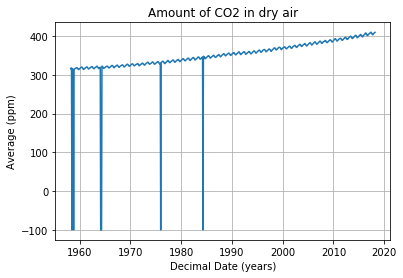

In [5]:
plt.plot(decimal_date,average)

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Average (ppm)')

We can see that there are dips in the graph. These coorespond to the value of -99.99 where -99.99 was replaced missing data. Now looking at the interpolated data, the missing values were replaced with estimated values. This will let us better see the trend of the other values.

Text(0,0.5,'Interpolated (ppm)')

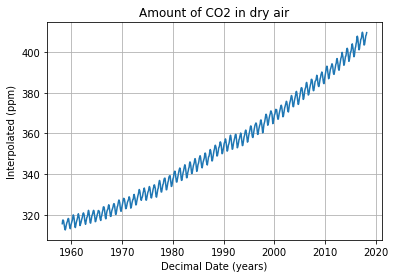

In [6]:
plt.plot(decimal_date,interpolated)

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Interpolated (ppm)')

We are now able to more see the shape of the curve. 

But using the trend data can narror down a more specific curve and linearizes the graph more than it was in interpolated data. The trend data tries to fit the values by removing the seasonal cycle.

Text(0,0.5,'Trend (ppm)')

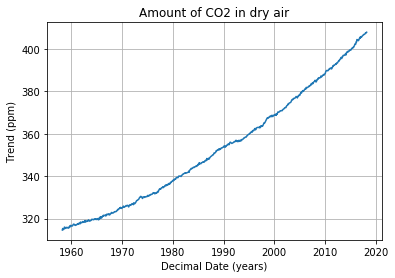

In [9]:
plt.plot(decimal_date,trend)

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Trend (ppm)')


Now we will fit a line, periodic function, and combination of linear and periodic function to the data. We will use the trend data to fit the linear data since it takes the seasonal variation away and shows trend of the data over the years. Which creates a more linear curve.

In [10]:
def linear_func( t, p, q):
    return p*t+q

linear_fit=scipy.optimize.curve_fit(linear_func,decimal_date,trend)

linear_slope=linear_fit[0][0]
linear_y_int=linear_fit[0][1]

linear=[]

for values in decimal_date:
    linear.append(values*linear_slope+linear_y_int)

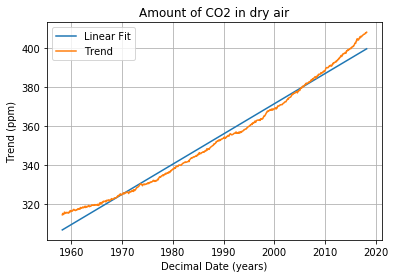

In [11]:
plt.plot(decimal_date,linear,label='Linear Fit')
plt.plot(decimal_date,trend,label='Trend')

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Trend (ppm)')
plt.legend(loc=0)



In [12]:
print('The graph was fit with the equation y=', linear_slope,'x',linear_y_int)

The graph was fit with the equation y= 1.5438822576406945 x -2716.38235740767


### $\chi^2 $ Test

To be able to quantify the accuracy of the fit model we will be using throughout this report, we will use a $\chi^2 $ Test to quantify the error between the different fit models.

The $\chi^2 $ Test in any arbritary case to be defined as:

$$
\begin{align*}
\chi^2=\sum\frac{(E-O)^2}{(uncertainty)^2}
\end{align*}
$$

Since we are comparing the same data over the different fit models, we will use the same uncertainty for observed values. Making this assumption may not give us an accurate value for our $\chi^2 $ Test. But this assumption systematically effects all values for the $\chi^2 $ Test and since we are comparing the same data to eachother, we can ignore the effects of it. 

For ease of calculation we can will say that: $$uncertainty=1 $$



In [13]:
chi_linear=0
for i,j in zip( trend, linear):
    chi_linear=chi_linear+(j-i)**2
print('The Chi Squared value was ', chi_linear,'for a linear trend of the whole data set.')

The Chi Squared value was  8666.952334518204 for a linear trend of the whole data set.


Now looking at the periodic function we will be only looking at an annual cycle of the data. In this case we will be looking at the year 2000.

In [14]:
def limit(year):
    """
    Function that finds where the year takes place in the list years
    
    Parameters:
    
    year- what year you're looking for
    
    Returns:
    
    start- where the year starts in the list years
    
    """
    n=0
    while years[n] != year:
        n=n+1
    start=n
    return start
        
        
    

In [15]:

years_limit=limit(2000)
years_limit=int(years_limit)

decimal_date_2000=[]
interpolated_2000=[]

for values in range(years_limit,years_limit+12):
    decimal_date_2000.append(decimal_date[values])
    interpolated_2000.append(interpolated[values])
    


In [16]:
def periodic_func(t,A,b,c):
    return A*np.cos(b*t+c)


periodic_fit=scipy.optimize.curve_fit(periodic_func,decimal_date_2000,interpolated_2000)

periodic_A=periodic_fit[0][0]
periodic_b=periodic_fit[0][1]
periodic_c=periodic_fit[0][2]

periodic=[]

for values in decimal_date_2000:
    periodic.append(periodic_A*np.cos(periodic_b*values+periodic_c))

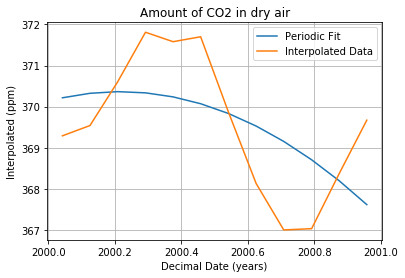

In [17]:
plt.plot(decimal_date_2000,periodic,label='Periodic Fit')
plt.plot(decimal_date_2000,interpolated_2000,label='Interpolated Data')

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Interpolated (ppm)')
plt.legend(loc=0)

In [18]:
print('The graph was fit with the equation y=', periodic_A,'cos(',periodic_b,'x+',periodic_c)

The graph was fit with the equation y= -370.36480314584463 cos( 0.16411644258951225 x+ 1786.023655319029


In [19]:
chi_periodic=0
for i,j in zip( interpolated_2000, periodic):
    chi_periodic=chi_periodic+(j-i)**2
print('The Chi Squared value was ', chi_periodic,'for a periodic trend of an anual data set.')

The Chi Squared value was  21.811454417681787 for a periodic trend of an anual data set.


Looking at the figure above we can see that the curve doesnt really fit the interpolated data. This is probably due to the the interpolated data starting at approximately 369ppm while the Periodic Fit data starts at 0. What scipy.optimize did was significantly increase the amplitude of the curve to make it fit the Interpolated. Now we will try to do the same fit but with a translation factor.

In [20]:
def periodic_func_2(t,A,b,c,d):
    return A*np.cos(b*t+c)+d


periodic_fit_2=scipy.optimize.curve_fit(periodic_func_2,decimal_date_2000,interpolated_2000)

periodic_A_2=periodic_fit_2[0][0]
periodic_b_2=periodic_fit_2[0][1]
periodic_c_2=periodic_fit_2[0][2]
periodic_d_2=periodic_fit_2[0][3]

periodic_2=[]

for values in decimal_date_2000:
    periodic_2.append(periodic_A_2*np.cos(periodic_b_2*values+periodic_c_2)+periodic_d_2)

The graph was fit with the equation y= -2.326237041581153 cos( -68.00117605484725 x+ 138016.8064269422 )+ 369.65365275447783


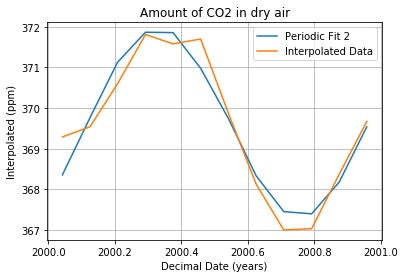

In [21]:
plt.plot(decimal_date_2000,periodic_2,label='Periodic Fit 2')
plt.plot(decimal_date_2000,interpolated_2000,label='Interpolated Data')

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Interpolated (ppm)')
plt.legend(loc=0)

print('The graph was fit with the equation y=', periodic_A_2,'cos(',periodic_b_2,'x+',periodic_c_2,')+',periodic_d_2)

In [22]:
chi_periodic_2=0
for i,j in zip( interpolated_2000, periodic_2):
    chi_periodic_2=chi_periodic_2+(j-i)**2
print('The Chi Squared value was ', chi_periodic_2,'for a periodic trend of an anual data set.')

The Chi Squared value was  2.250331835613832 for a periodic trend of an anual data set.


When adding the verticle translational factor we can see that the Period Fits better on the Interpolated Data and resulted in a smaller Chi Squared value of 2.25 when comparing to the initial periodic fit with a chi squared 21.81

In [23]:
def combined_func( t, p, q, A, b, c):
    return p*t+q+A*np.cos(b*t+c)

combined_fit=scipy.optimize.curve_fit(combined_func,decimal_date,interpolated)

combined_p=combined_fit[0][0]
combined_q=combined_fit[0][1]
combined_A=combined_fit[0][2]
combined_b=combined_fit[0][3]
combined_c=combined_fit[0][4]

combined=[]

for values in decimal_date:
    combined.append(combined_p*values+combined_q+combined_A*np.cos(combined_b*values+combined_c))

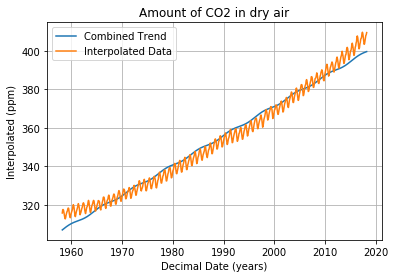

In [24]:
plt.plot(decimal_date,combined, label='Combined Trend')
plt.plot(decimal_date,interpolated, label='Interpolated Data')



plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Interpolated (ppm)')
plt.legend(loc=0)

In [25]:
print('The graph was fit with the equation y=', combined_p,'x+',combined_q,'+',combined_A,'cos(',combined_b,'x+',combined_c,')')

The graph was fit with the equation y= 1.5429912879749719 x+ -2714.6282498746627 + 0.6027105983307282 cos( 0.989806781299707 x+ 20.613065854144672 )


In [26]:
chi_combined=0
for i,j in zip( combined, interpolated):
    chi_combined=chi_combined+(j-i)**2
print('The Chi Squared value was ', chi_combined,'for a combined trend of the entire data set.')

The Chi Squared value was  11674.738637086688 for a combined trend of the entire data set.


Similar to the combined function instead of combining a linear function we will use an exponential, to make up for the slight curve in the graph.

In [27]:
def exp_func( t, q, A, b, c, e):
    return np.exp(e*t)+q+A*np.cos(b*t+c)
p_0=(-2716,0.6027105983307282,0.9898067,20.613065,0.003)
exp_fit=scipy.optimize.curve_fit(exp_func,decimal_date,interpolated)

exp_q=exp_fit[0][0]
exp_A=exp_fit[0][1]
exp_b=exp_fit[0][2]
exp_c=exp_fit[0][3]
exp_e=exp_fit[0][4]

exp=[]

for values in decimal_date:
    exp.append(np.exp(values)+exp_q+exp_A*np.cos(exp_b*values+exp_c))

/Users/KunalNaidu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/KunalNaidu/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/KunalNaidu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [28]:
for values in decimal_date:
    exp.append(np.exp(values)+combined_q+combined_A*np.cos(combined_b*values+combined_c))

/Users/KunalNaidu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Trying to fit the exponential we ran into an overflow error. This can be explained by taking the exponential of the decimal dates for example:

In [29]:
print(np.exp(decimal_date[0]))

inf


/Users/KunalNaidu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


We can fix this by scaling down both the decimal date values and the interpolated values using the equation

$$ Scale=\frac{x-mean}{Standard Deviation} $$

In [30]:
interpolated_scale=[]

scale_x= np.mean(interpolated),np.std(interpolated)

for i in interpolated:
    interpolated_scale.append((i-scale_x[0])/scale_x[1])

decimal_date_scale=[]

scale_y= np.mean(decimal_date),np.std(decimal_date)

for i in decimal_date:
    decimal_date_scale.append((i-scale_y[0])/scale_y[1])    


After scaling we will see plot both the new interpolated data to the new decimal date value.

Text(0,0.5,'Interpolated Scaled (ppm)')

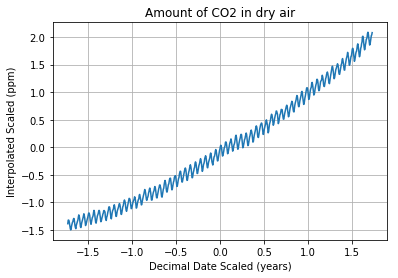

In [31]:
plt.plot(decimal_date_scale,interpolated_scale)

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date Scaled (years)')
plt.ylabel('Interpolated Scaled (ppm)')


Now we can see that the scaled decimal date values can be used in exponentials in a way that can give a finite value. 

In [32]:

exp_scale_fit=scipy.optimize.curve_fit(exp_func,decimal_date_scale,interpolated_scale,p_0)

exp_scale_q=exp_scale_fit[0][0]
exp_scale_A=exp_scale_fit[0][1]
exp_scale_b=exp_scale_fit[0][2]
exp_scale_c=exp_scale_fit[0][3]
exp_scale_e=exp_scale_fit[0][4]


exp_scale=[]

for values in decimal_date_scale:
    exp_scale.append(exp_func(values,exp_scale_q,exp_scale_A,exp_scale_b,exp_scale_c,exp_scale_e))

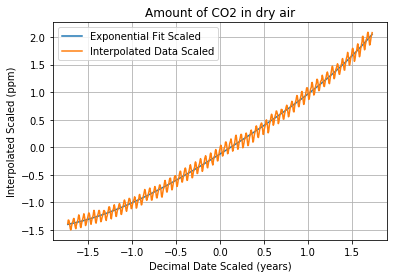

In [33]:
plt.plot(decimal_date_scale,exp_scale,label='Exponential Fit Scaled')
plt.plot(decimal_date_scale,interpolated_scale,label='Interpolated Data Scaled')

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date Scaled (years)')
plt.ylabel('Interpolated Scaled (ppm)')
plt.legend(loc=0)

In [34]:
print('exp(',exp_scale_e,'t)',exp_scale_q,exp_scale_A,'cos(',exp_scale_b,'t+',exp_scale_c,')')

exp( 0.6811620840729999 t) -1.3573650707643083 -0.36309731168794307 cos( 1.146950039011903 t+ 21.12794152128716 )


Now that we can get a fit of the data without getting overflow errors we can scale the data back to its original form. This can be done by:

$$ x=Scale*Standard Deviation+Mean $$

In [35]:
exp=[]
for values in exp_scale:
    exp.append(values*scale_x[1]+scale_x[0])

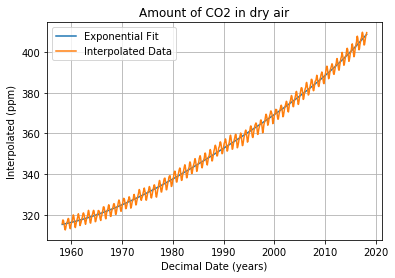

In [36]:
plt.plot(decimal_date,exp,label='Exponential Fit')
plt.plot(decimal_date,interpolated,label='Interpolated Data')

plt.grid('on')
plt.title('Amount of CO2 in dry air')
plt.xlabel('Decimal Date (years)')
plt.ylabel('Interpolated (ppm)')
plt.legend(loc=0)

Now that the values are un-scaled we can now evaluate the Chi squared value.

In [37]:
chi_exp=0
for i,j in zip( exp, interpolated):
    chi_exp=chi_exp+(j-i)**2
print('The Chi Squared value was ', chi_exp,'for a combined trend of the entire data set.')

The Chi Squared value was  3369.756325320213 for a combined trend of the entire data set.


## Discussion Summary

When looking at the annual data we were able to fit a periodic function to it. Initially we fit a cosine fuction without any kind of verticle translation. This did not fit the data as well since the cosine function was oscillating around zero but the actual data oscillated around 369 ppm.

Than we took the consine function and added a vertical translation variable to it. That helped the graph to be shifted to better fit the data. When calculating the Chi squared values, we saw that the cosine function with the verticle translation variable had a Chi squared value larger than that of the cosine function without the verticle translation. 

When looking at the total data, we first compared the trend data to the linear data. Choosing the trend data helped better to compare to a linear graph since there was no seasonal variation to it. This method is good to figure out a long term trend but does it in a way that simplifies the data. The calculated Chi squared value was 8666.95 for the linear fit.

This is where looking at it with the combined function would be more helpful. With the combined function we can attempt to fit the interpolated data to a function. This method can include the seasonal variation with it. When we actually plotted the combined function. We can see that the interpolated data is not linear.

Instead of using a combined function with a linear component. We changed it to a exponential with a cosine. It was done with the intention of being able to still have the cylical pattern but instead of an overall linear path, it rather take an exponential. The exponential was fitted with Chi squared value of 3369.76 and this was significantly smaller than our combined function which had a Chi squared value of 11674.74.

Although the exponential data did have a significantly smaller Chi squared value, it does not follow the seasonal cycle like intended. 

Scipy.optimize.curve_fit takes a P_0 value or vector which is a estimate of the variables. Changing the estimates effects the actual fit values for the variables that are outputted. Several attemps were made to figure out the best initial values to use for the coefficients. The coefficients used were chosen out of trial and error and were confirmed to be the best fit by graphing the function and manually determining it. Therefore the function needs the user to make some kind of secondary check to make sure it makes a best fit.

## Conclusion

We were able to analyze a set of data. Comparing different functions to fit the data for different sets of data. We determined that the exponential function better fit the data rather than the combined function and that even the exponential data doesnt perfectly fit the data set. 

We understood Scipy.optimize.curve_fit and how it relies heavily relies on user checks to be able to perfectly be able to fit a function. It also needs the user to be able to fit the correct function. As we saw when comparing the vertical translated periodic function to the periodic function without the translation. We see that there needs to be a idea of what kind of function the data needs to be fit by.